# Etapas del Análisis de Datos en Python

Este notebook resume y ejemplifica las **6 fases del análisis de datos en Python**, pensado para usar en clase como guía conceptual y práctica.

Fases:
1. Carga / Importación de datos
2. EDA básico (Exploración inicial)
3. Limpieza y preparación
4. Análisis y manipulación (EDA intermedio)
5. Visualización de datos
6. Conclusiones y comunicación


In [ ]:
# !pip install matplotlib seaborn plotly numpy pandas missingno

In [3]:
# Importación de librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Instalación de librerias generales

## Dataset de ejemplo

Para este notebook usaremos un pequeño dataset de ventas simulado directamente en código. En un escenario real, estos datos vendrían de un archivo, base de datos o API.

In [4]:
# Creación de un dataset de ejemplo
data = {
    'id_venta': [1, 2, 3, 4, 5, 6, 7, 8],
    'cliente': ['Ana', 'Luis', 'Ana', 'María', 'Pedro', 'Ana', 'Luis', 'María'],
    'categoria': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B'],
    'monto': [15000, 22000, 13000, 18000, 25000, np.nan, 21000, 26000],
    'ciudad': ['SJ', 'SJ', 'AL', 'AL', 'SJ', 'AL', 'SJ', None]
}

## 1. Carga / Importación de datos

En esta fase se **traen los datos desde su origen** (archivo, base de datos, API, etc.) hacia un DataFrame de pandas.

En un caso real se podría hacer algo así:
- `pd.read_csv('archivo.csv')`
- `pd.read_excel('archivo.xlsx')`
- Lecturas desde SQL o APIs.

En este notebook, se creará el DataFrame `df` a partir del diccionario que anteriormente se mostró.

In [5]:
df = pd.DataFrame(data)
df

,id_venta,cliente,categoria,monto,ciudad
0,1,Ana,A,15000.0,SJ
1,2,Luis,B,22000.0,SJ
2,3,Ana,A,13000.0,AL
3,4,María,C,18000.0,AL
4,5,Pedro,B,25000.0,SJ
5,6,Ana,A,NaN,AL
6,7,Luis,C,21000.0,SJ
7,8,María,B,26000.0,None


In [6]:
# Ejemplo típico de carga de datos desde un archivo CSV (comentado)
# df = pd.read_csv('ventas.csv')
df.head()

,id_venta,cliente,categoria,monto,ciudad
0,1,Ana,A,15000.0,SJ
1,2,Luis,B,22000.0,SJ
2,3,Ana,A,13000.0,AL
3,4,María,C,18000.0,AL
4,5,Pedro,B,25000.0,SJ


## 2. EDA básico (Exploración inicial)

El objetivo del EDA básico es **conocer la estructura general** del dataset antes de hacer cambios.

Preguntas típicas en esta fase:
- ¿Cuántas filas y columnas hay?
- ¿Qué tipos de datos tiene cada columna?
- ¿Hay valores nulos?
- ¿Cómo lucen las primeras filas?


In [7]:
# Dimensiones del DataFrame (filas, columnas)
df.shape

(8, 5)

In [8]:
# Primeras filas del dataset
df.head() # Por default tiene 5 filas, pero puedo poner cuantas quiero ver

,id_venta,cliente,categoria,monto,ciudad
0,1,Ana,A,15000.0,SJ
1,2,Luis,B,22000.0,SJ
2,3,Ana,A,13000.0,AL
3,4,María,C,18000.0,AL
4,5,Pedro,B,25000.0,SJ


In [9]:
# Ultimas filas del dataset
df.tail(2)

,id_venta,cliente,categoria,monto,ciudad
6,7,Luis,C,21000.0,SJ
7,8,María,B,26000.0,None


In [10]:
# Información general del DataFrame (tipos de datos, nulos, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_venta   8 non-null      int64  
 1   cliente    8 non-null      object 
 2   categoria  8 non-null      object 
 3   monto      7 non-null      float64
 4   ciudad     7 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 452.0+ bytes


In [11]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()

,id_venta,monto
count,8.00000,7.000000
mean,4.50000,20000.000000
std,2.44949,4898.979486
min,1.00000,13000.000000
25%,2.75000,16500.000000
50%,4.50000,21000.000000
75%,6.25000,23500.000000
max,8.00000,26000.000000


In [12]:
# Conteo de valores nulos por columna
df.isna().sum()

id_venta     0
cliente      0
categoria    0
monto        1
ciudad       1
dtype: int64

## 3. Limpieza y preparación de los datos

En esta fase se **corrigen problemas detectados** en el EDA básico, para dejar el dataset listo para análisis.

Acciones típicas:
- Eliminar o imputar valores nulos.
- Eliminar filas duplicadas.
- Corregir tipos de datos.
- Estandarizar texto (mayúsculas, espacios, etc.).
- Resolver valores incoherentes.


In [13]:
# Crear una copia limpia de trabajo
df_limpio = df.copy()

In [14]:
# Eliminar filas donde el monto sea nulo
df_limpio = df_limpio.dropna(subset=['monto'])
df_limpio

,id_venta,cliente,categoria,monto,ciudad
0,1,Ana,A,15000.0,SJ
1,2,Luis,B,22000.0,SJ
2,3,Ana,A,13000.0,AL
3,4,María,C,18000.0,AL
4,5,Pedro,B,25000.0,SJ
6,7,Luis,C,21000.0,SJ
7,8,María,B,26000.0,None


In [15]:
# Imputar valores nulos en 'ciudad' con el valor 'DESCONOCIDA'
df_limpio['ciudad'] = df_limpio['ciudad'].fillna('DESCONOCIDA')
df_limpio

,id_venta,cliente,categoria,monto,ciudad
0,1,Ana,A,15000.0,SJ
1,2,Luis,B,22000.0,SJ
2,3,Ana,A,13000.0,AL
3,4,María,C,18000.0,AL
4,5,Pedro,B,25000.0,SJ
6,7,Luis,C,21000.0,SJ
7,8,María,B,26000.0,DESCONOCIDA


In [19]:
# Estandarización simple de texto: pasar la ciudad a mayúsculas - upper o minúscula - lower
df_limpio['ciudad'] = df_limpio['ciudad'].str.lower()
df_limpio

,id_venta,cliente,categoria,monto,ciudad
0,1,Ana,A,15000.0,sj
1,2,Luis,B,22000.0,sj
2,3,Ana,A,13000.0,al
3,4,María,C,18000.0,al
4,5,Pedro,B,25000.0,sj
6,7,Luis,C,21000.0,sj
7,8,María,B,26000.0,desconocida


In [17]:
#como contar la cantidad de filas del df
len(df_limpio)

7

In [24]:
df_limpio.loc[0:4,["cliente","categoria"]] #filas específicas
#df_limpio.loc[:,["cliente","categoria"]] #todas las filas
#df_limpio.loc[0:4,:] #todas las columnas 

,cliente,categoria
0,Ana,A
1,Luis,B
2,Ana,A
3,María,C
4,Pedro,B


## 4. Análisis y manipulación (EDA intermedio)

En esta fase se profundiza en los datos para **encontrar patrones, relaciones y comportamientos**.

Operaciones típicas:
- Agrupar datos y calcular agregados (`groupby`).
- Calcular estadísticas específicas (medias, medianas, conteos).
- Filtrar subconjuntos de interés.
- Crear columnas derivadas que faciliten el análisis.


In [ ]:
# Total de ventas por cliente
ventas_por_cliente = df_limpio.groupby('cliente')['monto'].sum().reset_index() #reset_index para reiniciar indice
ventas_por_cliente

,cliente,monto
0,Ana,28000.0
1,Luis,43000.0
2,María,44000.0
3,Pedro,25000.0


In [26]:
df_limpio.loc[2]

id_venta           3
cliente          Ana
categoria          A
monto        13000.0
ciudad            al
Name: 2, dtype: object

In [36]:
#df_limpio.loc[df['cliente']=='Ana']

In [35]:
df_limpio.iloc[0:5]


,id_venta,cliente,categoria,monto,ciudad
0,1,Ana,A,15000.0,sj
1,2,Luis,B,22000.0,sj
2,3,Ana,A,13000.0,al
3,4,María,C,18000.0,al
4,5,Pedro,B,25000.0,sj


In [31]:
# Conteo de ventas por categoría
df_limpio['categoria'].value_counts()

categoria
B    3
A    2
C    2
Name: count, dtype: int64

In [39]:
# Filtrar únicamente las ventas mayores a 20,000
df_altos = df_limpio[df_limpio['monto'] > 20000].reset_index()
df_altos

,index,id_venta,cliente,categoria,monto,ciudad
0,1,2,Luis,B,22000.0,sj
1,4,5,Pedro,B,25000.0,sj
2,6,7,Luis,C,21000.0,sj
3,7,8,María,B,26000.0,desconocida


In [23]:
# Crear una columna derivada: monto en miles
df_limpio['monto_miles'] = df_limpio['monto'] / 1000
df_limpio

,id_venta,cliente,categoria,monto,ciudad,monto_miles
0,1,Ana,A,15000.0,SJ,15.0
1,2,Luis,B,22000.0,SJ,22.0
2,3,Ana,A,13000.0,AL,13.0
3,4,María,C,18000.0,AL,18.0
4,5,Pedro,B,25000.0,SJ,25.0
6,7,Luis,C,21000.0,SJ,21.0
7,8,María,B,26000.0,DESCONOCIDA,26.0


## 5. Visualización de datos

La visualización permite **comunicar hallazgos** de forma clara y rápida.

En este notebook se usa `matplotlib` para dos ejemplos sencillos:
- Gráfico de barras: ventas por cliente.
- Histograma: distribución de montos de venta.


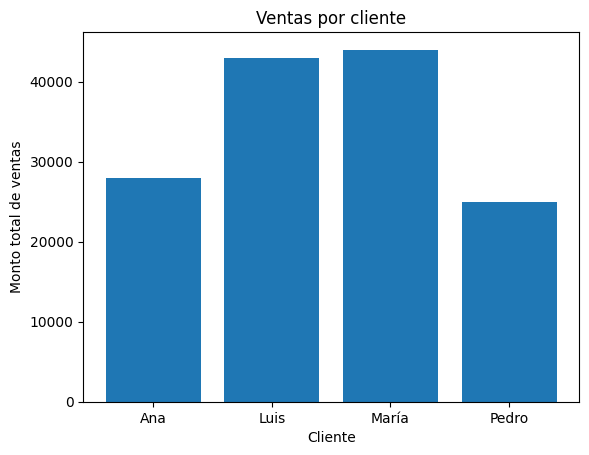

In [40]:
# Gráfico de barras: total de ventas por cliente
plt.figure()
plt.bar(ventas_por_cliente['cliente'], ventas_por_cliente['monto'])
plt.xlabel('Cliente')
plt.ylabel('Monto total de ventas')
plt.title('Ventas por cliente')
plt.show()

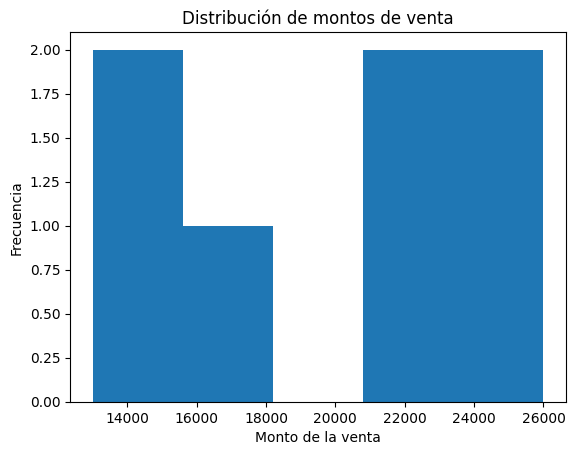

In [41]:
# Histograma de los montos de venta
plt.figure()
plt.hist(df_limpio['monto'], bins=5)
plt.xlabel('Monto de la venta')
plt.ylabel('Frecuencia')
plt.title('Distribución de montos de venta')
plt.show()

## 6. Conclusiones y comunicación

En una situación real, tras las fases anteriores, se redactarían **conclusiones** y **recomendaciones** basadas en los resultados.

Ejemplos de preguntas que podrían responderse con este dataset:
- ¿Qué cliente genera mayor monto de ventas?
- ¿Cuál es el rango típico de los montos de venta?
- ¿Hay alguna categoría que destaque sobre las demás?

Estas respuestas se pueden comunicar en:
- Un reporte escrito.
- Una presentación.
- Un dashboard.
- Un notebook bien documentado (como este).


---
### Resumen de las 6 fases
1. **Carga**: traer los datos al entorno de trabajo.
2. **EDA básico**: conocer la estructura y estado general de los datos.
3. **Limpieza**: corregir problemas y preparar los datos.
4. **Análisis / EDA intermedio**: encontrar patrones y relaciones.
5. **Visualización**: representar hallazgos de forma gráfica.
6. **Conclusiones**: convertir los datos en información útil para la toma de decisiones.
